In [1]:
# imports

from bs4 import BeautifulSoup as soup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline
from urllib.request import urlopen as ureq
import tqdm
import re



from selenium import webdriver
from selenium.webdriver.common.keys import Keys



from time import sleep

In [2]:
# _____Webscrapping Sumsung phones

file_name='Sumsung_phones_group_project_Final.csv'
f=open(file_name,'w')
headers="Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)  \n"
f.write(headers)
driver = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')
my_url = 'https://www.bestbuy.ca/en-ca/category/unlocked-samsung-phones/12535387'
driver.get(my_url)

In [ ]:
for i in range(24):
    try:
        element = driver.find_element_by_xpath("//*[@id='root']/div/div/div[2]/div[2]/a/div/button/span")
        sleep(2)
        element.click()
#       HTML parsing
    except:
        pass
html=driver.page_source
page_soup=soup(html,"html.parser")

sumsung_phones= page_soup.findAll("div", {"class":"col-xs-12_1GBy8 col-sm-4_NwItf col-lg-3_2V2hX x-productListItem productLine_2N9kG"})
    
    
driver2 = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')




for phone in sumsung_phones[1:]:
    
  
    sumsung_links= phone.div.a.get('href')
    link='https://www.bestbuy.ca{}'.format(sumsung_links)
    driver2.get(link)
    html=driver2.page_source

    sleep(2)  
    link_soup=soup(html,"html.parser")
    
    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass
    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")

    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(2)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
    
    try:
        item_container=link_soup.findAll("div",{"class":"itemContainer_RJI-h"})
    except:
        pass


# phone_container_model=driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]")


    
       
    for tag in item_container:
        try:             
            #         
            if list(tag.children)[0].text == 'Memory - Built-in':
                mem = list(tag.children)[1].text
                mem=mem.replace("GB", "")
                mem=mem.replace("gb", "")
                mem=mem.replace(",","")
                mem=mem.strip()
        except:
            pass
        
        try:            
            if list(tag.children)[0].text == 'RAM Size':
                ram_size = list(tag.children)[1].text
                ram_size = ram_size.replace("GB", "")
                ram_size = ram_size.replace("gb", "")
                ram_size=ram_size.replace(",","")
                ram_size=ram_size.strip()
        except:
            pass
        
        try:
           
            if list(tag.children)[0].text == 'Display Resolution':
                display_resolution = list(tag.children)[1].text
                display_resolution=display_resolution.replace(",", "")
                display_resolution=display_resolution.replace("pixels","")
                display_resolution=display_resolution.lower().split("(", 1)[0]
                display_resolution=display_resolution.replace("wqhd+", "")
                display_resolution=display_resolution.replace("quad hd+","")
                
                display_resolution=display_resolution.strip()
        except:
            pass
                
        try:
            if list(tag.children)[0].text == 'Display Size':
                display_size = list(tag.children)[1].text
                display_size = display_size.replace(",", "")
                display_size=display_size.replace("in", "")
                display_size=display_size.replace("IN","")
                display_size=display_size.strip()
        except:
            pass 
        
        try:
            if list(tag.children)[0].text == 'Colour':
                colour = list(tag.children)[1].text
                colour=colour.replace(",","")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'CPU':
                cpu_n = list(tag.children)[1].text
                cpu_n =cpu_n.replace(",", "")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'Front-Facing Camera Resolution':
                f_camera = list(tag.children)[1].text
                f_camera=f_camera.replace(",", "")
                f_camera=f_camera.lower().split("mp", 1)[0]
                f_camera=f_camera.lower().split("-", 1)[0]
                f_camera=f_camera.replace("-megapixel", "")
                f_camera=f_camera.strip()
                
                
        except:
            pass
        try:
            if list(tag.children)[0].text == 'Rear Camera Resolution':
                r_camera = list(tag.children)[1].text
                r_camera=r_camera.replace(",", "")
                r_camera=r_camera.lower().split("mp", 1)[0]
                r_camera=r_camera.lower().split("-", 1)[0]


                r_camera=r_camera.replace("MP","")
                r_camera=r_camera.replace("mp", "")
                r_camera=r_camera.replace("Wide-Angle & Telephoto Cameras", "")
                r_camera=r_camera.replace("super speed dual pixel ","")
                r_camera=r_camera.strip()
                
        except:
            pass
        
        
        
        
        
        
        
#                 if list(tag.children)[0].text == 'CPU':
#                      cpu_n = list(tag.children)[1].text
                        
                        
                        
        
                
#                 mdl='missing'
#             wc='missing'
#             mem='missing'
#             ram_size='missing'
#             display_resolution='missing'
#             display_size='missing'
#             colour='missing'
#                 cpu_n='missing'


#     print("Price:", price)
#     print("price_save:", price_save)
#     print("brand:",brand)
#     print("model:", model)
#     print("mem:", mem)
# #     print("display_resolution",display_resolution)
#     print("ram_size:", ram_size)
# #     print("cpu_n:", cpu_n)
#     print("front camera: ",f_camera)
#     print("rear camera: ", r_camera)
    f.write(brand + "," + model + "," + price + "," + price_save + "," + mem + "," + ram_size + "," + display_resolution + "," + display_size + "," + colour + "," + cpu_n + ","  + f_camera + "," + r_camera + "\n")


f.close()
   





In [7]:
# WEBSCRAPING APPLE PHONES
file_name='Apple_phones_group_Final2.csv'
f=open(file_name,'w')
headers="Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)  \n"
f.write(headers)
driver = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')
my_url = 'https://www.bestbuy.ca/en-ca/category/unlocked-iphones/743358'
driver.get(my_url)

In [ ]:
for i in range(1100):
    try:
        element = driver.find_element_by_xpath("//*[@id='root']/div/div/div[2]/div[2]/a/div/button/span")
        sleep(3)
        element.click()
#       HTML parsing
    except:
        pass
    

html=driver.page_source
page_soup=soup(html,"html.parser")

apple_phones= page_soup.findAll("div", {"class":"col-xs-12_1GBy8 col-sm-4_NwItf col-lg-3_2V2hX x-productListItem productLine_2N9kG"})
    
    
driver2 = webdriver.Chrome('C:\\Users\\AZ\\Desktop\\bootcamp\\Python\\webscraping\\chromedriver.exe')




for phone in apple_phones[1:]:
    
  
    apple_links= phone.div.a.get('href')
    link='https://www.bestbuy.ca{}'.format(apple_links)
    driver2.get(link)
    html=driver2.page_source

    sleep(3)  
    link_soup=soup(html,"html.parser")
    
    try:
        price_container=phone.findAll("div", {"class":"productPricingContainer_3gTS3"})
        price=price_container[0].span.div.text
        price=price.replace(",","")
        price=price.replace("$","")
    except:
        price='no price'
   
     
    try:
        price_sale_container=phone.findAll("span", {"class":"productSaving_3YmNX undefined"})
        price_save=price_sale_container[0].text
        price_save=price_save.replace(",","")
        price_save=price_save.replace("SAVE","")
        price_save=price_save.replace("$","")
        

    except:
        price_save = 'no sale'
    
    try:
        product_name_container=link_soup.findAll("h1",{"class":"productName_19xJx"})
        product_name=product_name_container[0].text
        product_name=product_name.replace("," , "/")
        brand=product_name.split(" ",3)[0]
        model=product_name.split(" ",3)[1]+" " +product_name.split(" ",3)[2]
    except:
        brand='no brand'
        model='no model'

    try:    
        element3 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']")
        element3.click()
    except:
        pass

    sleep(5)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
   
    try:
        element4 = driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]/button")
        element4.click()

    except:
        pass

    sleep(5)
    
    html=driver2.page_source
    link_soup=soup(html,"html.parser")
    
    try:
        item_container=link_soup.findAll("div",{"class":"itemContainer_RJI-h"})
    except:
        pass


# phone_container_model=driver2.find_element_by_xpath("//*[@id='detailsAndSpecs']/div[1]/div[2]")


    
       
    for tag in item_container:
        try:             
            #         
            if list(tag.children)[0].text == 'Memory - Built-in':
                mem = list(tag.children)[1].text
                mem=mem.replace("GB", "")
                mem=mem.replace("gb", "")
                mem=mem.replace(",","")
                mem=mem.strip()
        except:
            pass
        
        try:            
            if list(tag.children)[0].text == 'RAM Size':
                ram_size = list(tag.children)[1].text
                ram_size = ram_size.replace("GB", "")
                ram_size = ram_size.replace("gb", "")
                ram_size=ram_size.replace(",","")
                ram_size=ram_size.strip()
        except:
            pass
        
        try:
           
            if list(tag.children)[0].text == 'Display Resolution':
                display_resolution = list(tag.children)[1].text
                display_resolution=display_resolution.replace(",", "")
                display_resolution=display_resolution.replace("pixels","")
                display_resolution=display_resolution.lower().split("(", 1)[0]
                display_resolution=display_resolution.strip()
        except:
            pass
                
        try:
            if list(tag.children)[0].text == 'Display Size':
                display_size = list(tag.children)[1].text
                display_size = display_size.replace(",", "")
                display_size=display_size.replace("in", "")
                display_size=display_size.replace("IN","")
                display_size=display_size.strip()
        except:
            pass 
        
        try:
            if list(tag.children)[0].text == 'Colour':
                colour = list(tag.children)[1].text
                colour=colour.replace(",","")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'CPU':
                cpu_n = list(tag.children)[1].text
                cpu_n =cpu_n.replace(",", "")
        except:
            pass
        
        try:
            if list(tag.children)[0].text == 'Front-Facing Camera Resolution':
                f_camera = list(tag.children)[1].text
                f_camera=f_camera.replace(",", "")
                f_camera=f_camera.lower().split("mp", 1)[0]
                f_camera=f_camera.lower().split("-", 1)[0]
                f_camera=f_camera.replace("-megapixel", "")
                f_camera=f_camera.strip()
                
                
        except:
            pass
        try:
            if list(tag.children)[0].text == 'Rear Camera Resolution':
                r_camera = list(tag.children)[1].text
                r_camera=r_camera.replace(",", "")
                r_camera=r_camera.lower().split("mp", 1)[0]
                r_camera=r_camera.lower().split("-", 1)[0]


                r_camera=r_camera.replace("MP","")
                r_camera=r_camera.replace("mp", "")
                r_camera=r_camera.replace("Wide-Angle & Telephoto Cameras", "")
                r_camera=r_camera.replace("3 x ","")
                r_camera=r_camera.strip()
                
        except:
            pass
        
        
        
        
        
        
#                 if list(tag.children)[0].text == 'CPU':
#                      cpu_n = list(tag.children)[1].text
                        
                        
                        
        
                
#                 mdl='missing'
#             wc='missing'
#             mem='missing'
#             ram_size='missing'
#             display_resolution='missing'
#             display_size='missing'
#             colour='missing'
#                 cpu_n='missing'

    f.write(brand + "," + model + "," + price + "," + price_save + "," + mem + "," + ram_size + "," + display_resolution + "," + display_size + "," + colour + "," + cpu_n + ","  + f_camera + "," + r_camera + "\n")

f.close()
   



# Visualization

In [2]:
import pandas as pd
import numpy as np
import random 

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px


py.init_notebook_mode(connected=True)


In [43]:
Samsung_pd = pd.read_csv('C:/Users/mehdi/Downloads/Sumsung_phones_group_project_Database.csv',sep=",",index_col=False)
Samsung_pd.head(5)
Samsung_pd['Brand']=[t.upper() for t in Samsung_pd['Brand']]
Samsung_pd


,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,SAMSUNG,Galaxy A10e,179.99,20,32,2,720 x 1560,5.8,Black,Octa-core Snapdragon 855,5,8
1,SAMSUNG,Galaxy S20,1849.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
2,SAMSUNG,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
3,SAMSUNG,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
4,SAMSUNG,Galaxy S20,2109.99,no sale,512,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...
528,SAMSUNG,Galaxy S9,399.00,300,64,4,samoled,5.8,Titanium Grey,Qualcomm MSM8998 Snapdragon 845,8,12
529,SAMSUNG,GALAXY S8,399.00,no sale,64,4,samoled,5.8,Titanium Grey,Qualcomm MSM8998 Snapdragon 845,8,12
530,SAMSUNG,Galaxy S9+,449.99,250,64,6,samoled,6.2,Midnight Black,Qualcomm MSM8998 Snapdragon 845,8,12
531,SAMSUNG,Galaxy J3,129.99,69,16,6,samoled,6.2,Midnight Black,1.4GHz,8,8


In [44]:
Apple_pd = pd.read_csv('C:/Users/mehdi/Downloads/Apple_phones_group_Final2.csv',sep=",",index_col=False, encoding='latin-1')
Apple_pd.head(5)
Apple_pd['Brand']=[t.upper() for t in Apple_pd['Brand']]
Apple_pd



,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,APPLE,iPhone 7,223.40,270,32,2,750 x 1334,4.7,Black,Apple A10 Fusion,7,12
1,APPLE,iPhone 8,354.10,245,64,2,1334 x 750,4.7,Grey,Apple A11 Bionic,7,12
2,APPLE,iPhone XR,598.99,101,64,3,1792 x 828,6.1,Black,Apple A12 Bionic,7,12
3,APPLE,iPhone 11,979.99,no sale,64,3,1792 x 828,6.1,Black,A13 Bionic Chip,7,12
4,APPLE,iPhone X,624.99,575,256,3,2436 x 1125,5.8,Silver,Apple A11 Bionic,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...
983,APPLE,iPhone XR,719.78,39,128,3,1792 x 828,6.1,Blue,Apple A12 Bionic,7,12
984,APPLE,iPhone X,825.00,704,256,3,2436 x 1125,5.8,Silver,Apple A11 Bionic,7,12
985,APPLE,iPhone 6s,371.00,6,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12
986,APPLE,iPhone 6,194.00,105,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12


In [ ]:
x=Apple_pd.groupby('Model').count()
x
x.plot(kind='bar');



In [45]:
Samsung_Apple=pd.concat([Samsung_pd, Apple_pd])
Samsung_Apple
Samsung_Apple.drop(Samsung_Apple['Brand']=='certified')
Samsung_Apple.drop(Samsung_Apple['Brand']=='Unlocked')


,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
1,SAMSUNG,Galaxy S20,1849.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
2,SAMSUNG,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
3,SAMSUNG,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
4,SAMSUNG,Galaxy S20,2109.99,no sale,512,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
5,SAMSUNG,Galaxy A20,149.97,200,512,3,720 x 1560,5.8,Black,Octa-core Snapdragon 865,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...
983,APPLE,iPhone XR,719.78,39,128,3,1792 x 828,6.1,Blue,Apple A12 Bionic,7,12
984,APPLE,iPhone X,825.00,704,256,3,2436 x 1125,5.8,Silver,Apple A11 Bionic,7,12
985,APPLE,iPhone 6s,371.00,6,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12
986,APPLE,iPhone 6,194.00,105,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12


In [15]:
Samsung_Apple.columns

Index(['Brand', 'Model', 'Price(CAD)', 'Price_save(CAD)',
       'Memory-Built-in(GB)', 'Ram_size(GB)', 'Display_resolution(pixels)',
       'Display_size(in)', 'Colour', 'CPU',
       'Front-Facing Camera Resolution(MP)', 'Rear Camera Resolution(MP)  '],
      dtype='object')

In [46]:
# ___Histogram of price for two brands
fig = px.histogram(Samsung_Apple,x='Price(CAD)',color="Brand")
fig.show()



In [47]:
       
price_range = pd.cut(Samsung_Apple['Price(CAD)'], [0,500, 1000, 1500,2000,2500,3000])
table = pd.pivot_table(Samsung_Apple, values=['Ram_size(GB)', 'Memory-Built-in(GB)','Front-Facing Camera Resolution(MP)','Rear Camera Resolution(MP)  '
], index=['Brand', price_range],
                    aggfunc={'Ram_size(GB)': [max,min],
                         'Memory-Built-in(GB)' :[max,min], 'Front-Facing Camera Resolution(MP)' :[max,min], 'Rear Camera Resolution(MP)  ' :[max,min]
                            })
                    
table

Front-Facing Camera Resolution(MP)       \
                                                    max  min   
Brand   Price(CAD)                                             
APPLE   (0, 500]               vga videocalling over wi  1.2   
        (500, 1000]                             720p hd  1.2   
        (1000, 1500]                                  7   12   
        (1500, 2000]                                  7   12   
SAMSUNG (0, 500]                                     no  1.9   
        (500, 1000]                           front : 5   10   
        (1000, 1500]                                  8   10   
        (1500, 2000]                                  5   10   
        (2000, 2500]                                  5    5   

                     Memory-Built-in(GB)       Ram_size(GB)      \
                                     max   min          max min   
Brand   Price(CAD)                                                
APPLE   (0, 500]                       8   128            4   1   
        (500, 1000]                   64   128            4   1   
        (1000, 1500]                  64   128            4   2   
        (1500, 2000]                  64   256            4   2   
SAMSUNG (0, 500]                       8   128            8   1   
        (500, 1000]                    8   128            8   1   
        (1000, 1500]                 512   128            8  12   
        (1500, 2000]                 512  1000            8  12   
        (2000, 2500]                 512   512            2   2   

                     Rear Camera Resolution(MP)        
                                              max min  
Brand   Price(CAD)                                     
APPLE   (0, 500]                            x3 12  12  
        (500, 1000]                       dual 12  12  
        (1000, 1500]                        x3 12  12  
        (1500, 2000]                        x3 12  12  
SAMSUNG (0, 500]                        single 13  12  
        (500, 1000]                 x3 camera; 12  12  
        (1000, 1500]                x3 camera; 12  12  
        (1500, 2000]                            8  12  
        (2000, 2500]                            8   8

In [75]:

# --- the distribution of phone based on the colour

phone_colour=Samsung_pd['Colour'].value_counts()
m=phone_colour.index
n=[]
for i in m:
    
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
    
    if 'blue' in i.lower():
        i="blue"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
            
            

           
    
    if 'black' == i.lower():
        i="  #000000"
        n.append(i.lower())

    if 'black onyx' == i.lower():
        i=" #333333"
        n.append(i.lower())
        
    if 'prism black' == i.lower():
        i=" #404040"
        n.append(i.lower())
        
    if 'aura black' == i.lower():
        i=" #0d0d0d"
        n.append(i.lower())
        
    if 'midnight black' == i.lower():
        i="  #1a1a1a"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    
       
    if 'grey'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
    if 'black' in i.lower():
        i="  #000000"
        n.append(i.lower())
        

        
    if 'titanium grey'== i.lower():
        i="grey"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
  
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold' in i.lower():
        i='gold'
        n.append(i)
        
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
   
        
        
        
        


In [81]:
colors = n


fig = go.Figure(data=[go.Bar(
    x=phone_colour.index,
    y=phone_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')


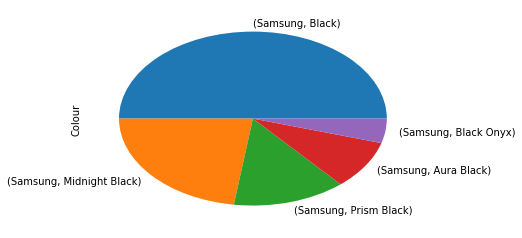

In [31]:
Samsung_colour =Samsung_pd.groupby(['Brand'])['Colour'].value_counts()
Samsung_colour.plot(kind='pie')

In [90]:
Apple_colour =Apple_pd['Colour'].value_counts()



m=Apple_colour.index
n=[]
for i in m:
    
    if 'black' in i.lower():
        i="black"
        n.append(i.lower())

       
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
       
    if 'gray'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
       
       

        
    if 'grey'==i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold'==i.lower():
        i='gold'
        n.append(i)
        
        
    if 'blue' in i.lower():
        i='blue'
        n.append(i)
        
    if 'yellow' in i.lower():
        i='yellow'
        n.append(i)
        
    if 'green'==i.lower():
        i='green'
        n.append(i)
        
    if 'gold white'==i.lower():
        i='gold'
        n.append(i)
    if 'rose'==i.lower():
        i='pink'
        n.append(i)
        
    
        
        
        
        
        
colors = n


fig = go.Figure(data=[go.Bar(
    x=Apple_colour.index,
    y=Apple_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')

In [91]:
Samsung_Apple.groupby("Brand")['Price(CAD)'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
APPLE,988.0,474.255688,323.553387,79.98,249.95,359.0,640.7425,1999.99
SAMSUNG,533.0,481.155497,341.360080,79.99,229.00,380.0,629.9900,2109.99


In [95]:
# --Phones with discout
Samsung_Apple[Samsung_Apple['Price_save(CAD)']!='no sale']

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,SAMSUNG,Galaxy A10e,179.99,20,32,2,720 x 1560,5.8,Black,Octa-core Snapdragon 855,5,8
5,SAMSUNG,Galaxy A20,149.97,200,512,3,720 x 1560,5.8,Black,Octa-core Snapdragon 865,8,13
6,SAMSUNG,Galaxy Note10+,939.99,560,256,12,3040 x 1440,6.8,Aura Black,Snapdragon 855,10,12
10,SAMSUNG,Galaxy A51,368.90,131,64,4,1080 x 2340,6.4,Black,Octa-core Snapdragon 865,25,25
14,SAMSUNG,Galaxy S10,639.99,360,128,8,3040 x 1440,6.1,Prism Black,Octa-core Snapdragon 855,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...
983,APPLE,iPhone XR,719.78,39,128,3,1792 x 828,6.1,Blue,Apple A12 Bionic,7,12
984,APPLE,iPhone X,825.00,704,256,3,2436 x 1125,5.8,Silver,Apple A11 Bionic,7,12
985,APPLE,iPhone 6s,371.00,6,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12
986,APPLE,iPhone 6,194.00,105,256,2,1920 x 1080,5.5,Rose Gold,Dual-core 1.84 GHz Twister,5,12


In [96]:
# ---Average,max,min price


stat=['Max', 'Min', 'Avg']
YS=Samsung_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YA=Apple_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YS.values[0][1:4]

fig = go.Figure(data=[
    go.Bar(name='Samsung Phone', x=stat, y=[YS.values[0][1], YS.values[0][2],YS.values[0][3]]),
    go.Bar(name='Apple Phone', x=stat, y=[YA.values[0][1], YA.values[0][2],YA.values[0][3]])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()


In [97]:
# --The details and specefication of the most expensive phones
x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].max()]
y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].max()]
MAX_SA=pd.concat([x, y])
MAX_SA


,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
4,SAMSUNG,Galaxy S20,2109.99,no sale,512,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
243,APPLE,iPhone 11,1999.99,no sale,512,4,1242 x 2688,6.5,Silver,Apple A13 Bionic,12,x3 12


In [98]:
# --The details and specefication of the cheapest phones

x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].min()]
y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].min()]
MIN_SA=pd.concat([x, y])
MIN_SA

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
122,SAMSUNG,Galaxy Rugby,79.99,40,64,6,samoled,6.2,Lilac Purple,Qualcomm MSM8998 Snapdragon 845,8,12
140,APPLE,iPhone 5c,79.98,60,64,1,1136 x 640,4.0,Blue,Dual-core 1.3 GHz Swift (ARM v7-based),1.2,8


In [ ]:
apple = pd.read_csv('C://Users//AZ//Desktop//bootcamp//Python//webscraping//Apple_phones_group_Final2.csv', encoding= 'unicode_escape')
apple.head(20)

In [7]:
samsung = pd.read_csv('C://Users//AZ//Desktop//bootcamp//Python//webscraping//Sumsung_phones_group_project_Database.csv', encoding= 'unicode_escape')
samsung.head()

,Brand,Model,Price(CAD),Price_save(CAD),Memory-Built-in(GB),Ram_size(GB),Display_resolution(pixels),Display_size(in),Colour,CPU,Front-Facing Camera Resolution(MP),Rear Camera Resolution(MP)
0,Samsung,Galaxy A10e,179.99,20,32,2,720 x 1560,5.8,Black,Octa-core Snapdragon 855,5,8
1,Samsung,Galaxy S20,1849.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
2,Samsung,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
3,Samsung,Galaxy S20,1319.99,no sale,128,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8
4,Samsung,Galaxy S20,2109.99,no sale,512,2,720 x 1560,5.8,Black,Octa-core Snapdragon 865,5,8


In [12]:
samsung_models.head(10)

Galaxy Note    40
Galaxy S7      40
Galaxy S8      31
Galaxy S10     28
Galaxy S9      26
Galaxy J3      24
Galaxy S10+    23
Galaxy S6      22
Galaxy S9+     21
Galaxy S10e    21
Name: Model, dtype: int64

In [12]:
apple_models = apple['Model'].value_counts().head(10
                                                 )
apple_models

iPhone 7     181
iPhone 6s    111
iPhone XR     86
iPhone 8      86
iPhone XS     83
iPhone 6      82
iPhone SE     54
iPhone 11     54
- Apple       42
iPhone 6S     27
Name: Model, dtype: int64

In [ ]:
sns.pairplot(samsung)


In [ ]:
sns.pairplot(apple)

C:\Users\AZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.



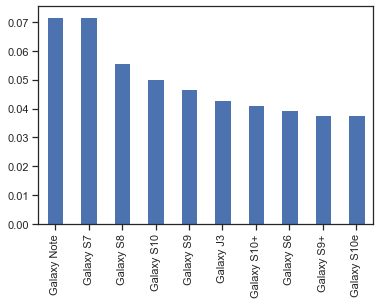

In [22]:
samsung['Model'].value_counts(10).head(10).plot('bar');
# 0.07% of all phones were either Galaxy Note or Galaxy S7


In [ ]:
Model = samsung['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(200,150,180,0.8)'
    }
)

layout = go.Layout(
    title='Model Type Counts Samsung',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)

In [18]:
Model = apple['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(65,33,180,120)'
    }
)

layout = go.Layout(
    title='Model Type Counts Apple',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)

In [ ]:
# Visualization

import pandas as pd
import numpy as np
import random 

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px


py.init_notebook_mode(connected=True)


Samsung_pd = pd.read_csv('C:/Users/mehdi/Downloads/Sumsung_phones_group_project_Database.csv',sep=",",index_col=False)
Samsung_pd.head(5)
Samsung_pd['Brand']=[t.upper() for t in Samsung_pd['Brand']]
Samsung_pd


Apple_pd = pd.read_csv('C:/Users/mehdi/Downloads/Apple_phones_group_Final2.csv',sep=",",index_col=False, encoding='latin-1')
Apple_pd.head(5)
Apple_pd['Brand']=[t.upper() for t in Apple_pd['Brand']]
Apple_pd



x=Apple_pd.groupby('Model').count()
x
x.plot(kind='bar');



Samsung_Apple=pd.concat([Samsung_pd, Apple_pd])
Samsung_Apple
Samsung_Apple.drop(Samsung_Apple['Brand']=='certified')
Samsung_Apple.drop(Samsung_Apple['Brand']=='Unlocked')


Samsung_Apple.columns

# ___Histogram of price for two brands
fig = px.histogram(Samsung_Apple,x='Price(CAD)',color="Brand")
fig.show()



       
price_range = pd.cut(Samsung_Apple['Price(CAD)'], [0,500, 1000, 1500,2000,2500,3000])
table = pd.pivot_table(Samsung_Apple, values=['Ram_size(GB)', 'Memory-Built-in(GB)','Front-Facing Camera Resolution(MP)','Rear Camera Resolution(MP)  '
], index=['Brand', price_range],
                    aggfunc={'Ram_size(GB)': [max,min],
                         'Memory-Built-in(GB)' :[max,min], 'Front-Facing Camera Resolution(MP)' :[max,min], 'Rear Camera Resolution(MP)  ' :[max,min]
                            })
                    
table


# --- the distribution of phone based on the colour

phone_colour=Samsung_pd['Colour'].value_counts()
m=phone_colour.index
n=[]
for i in m:
    
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
    
    if 'blue' in i.lower():
        i="blue"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
            
            

           
    
    if 'black' == i.lower():
        i="  #000000"
        n.append(i.lower())

    if 'black onyx' == i.lower():
        i=" #333333"
        n.append(i.lower())
        
    if 'prism black' == i.lower():
        i=" #404040"
        n.append(i.lower())
        
    if 'aura black' == i.lower():
        i=" #0d0d0d"
        n.append(i.lower())
        
    if 'midnight black' == i.lower():
        i="  #1a1a1a"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    
       
    if 'grey'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
    if 'black' in i.lower():
        i="  #000000"
        n.append(i.lower())
        

        
    if 'titanium grey'== i.lower():
        i="grey"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
  
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold' in i.lower():
        i='gold'
        n.append(i)
        
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
   
        
        
        
        


colors = n


fig = go.Figure(data=[go.Bar(
    x=phone_colour.index,
    y=phone_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')


Samsung_colour =Samsung_pd.groupby(['Brand'])['Colour'].value_counts()
Samsung_colour.plot(kind='pie')

Apple_colour =Apple_pd['Colour'].value_counts()



m=Apple_colour.index
n=[]
for i in m:
    
    if 'black' in i.lower():
        i="black"
        n.append(i.lower())

       
    if 'green' in i.lower():
        i="green"
        n.append(i.lower())
        
       
    if 'gray'== i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
       
    if 'space gray'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
        
    if 'space grey'== i.lower():
        i= ' #8c8c8c'
        n.append(i.lower())
       
       

        
    if 'grey'==i.lower():
        i="hsl(30, 0%, 50%)"
        n.append(i.lower())
        
        
    if 'silver' in i.lower():
        i="silver"
        n.append(i.lower())
        
    if 'purple' in i.lower():
        i="purple"
        n.append(i.lower())
        
    if 'red' in i.lower():
        i="red"
        n.append(i.lower())
        
    if 'white' in i.lower():
        i="white"
        n.append(i.lower())
        
    if 'rose gold' in i.lower():
        i="pink"
        n.append(i)
           
        
    if 'gold'==i.lower():
        i='gold'
        n.append(i)
        
        
    if 'blue' in i.lower():
        i='blue'
        n.append(i)
        
    if 'yellow' in i.lower():
        i='yellow'
        n.append(i)
        
    if 'green'==i.lower():
        i='green'
        n.append(i)
        
    if 'gold white'==i.lower():
        i='gold'
        n.append(i)
    if 'rose'==i.lower():
        i='pink'
        n.append(i)
        
    
        
        
        
        
        
colors = n


fig = go.Figure(data=[go.Bar(
    x=Apple_colour.index,
    y=Apple_colour.values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Least Used Feature')

Samsung_Apple.groupby("Brand")['Price(CAD)'].describe()

# --Phones with discout
Samsung_Apple[Samsung_Apple['Price_save(CAD)']!='no sale']

# ---Average,max,min price


stat=['Max', 'Min', 'Avg']
YS=Samsung_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YA=Apple_pd.groupby(['Brand'],as_index=False).agg({'Price(CAD)':['max','min','mean']})
YS.values[0][1:4]

fig = go.Figure(data=[
    go.Bar(name='Samsung Phone', x=stat, y=[YS.values[0][1], YS.values[0][2],YS.values[0][3]]),
    go.Bar(name='Apple Phone', x=stat, y=[YA.values[0][1], YA.values[0][2],YA.values[0][3]])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()


# --The details and specefication of the most expensive phones
x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].max()]
y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].max()]
MAX_SA=pd.concat([x, y])
MAX_SA


# --The details and specefication of the cheapest phones

x=Samsung_pd[Samsung_pd['Price(CAD)']==Samsung_pd['Price(CAD)'].min()]
y=Apple_pd[Apple_pd['Price(CAD)']==Apple_pd['Price(CAD)'].min()]
MIN_SA=pd.concat([x, y])
MIN_SA

apple = pd.read_csv('C://Users//AZ//Desktop//bootcamp//Python//webscraping//Apple_phones_group_Final2.csv', encoding= 'unicode_escape')
apple.head(20)

samsung = pd.read_csv('C://Users//AZ//Desktop//bootcamp//Python//webscraping//Sumsung_phones_group_project_Database.csv', encoding= 'unicode_escape')
samsung.head()



samsung_models.head(10)

apple_models = apple['Model'].value_counts().head(10
                                                 )
apple_models

sns.pairplot(samsung)


sns.pairplot(apple)

samsung['Model'].value_counts(10).head(10).plot('bar');
# 0.07% of all phones were either Galaxy Note or Galaxy S7


Model = samsung['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(200,150,180,0.8)'
    }
)

layout = go.Layout(
    title='Model Type Counts Samsung',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)

Model = apple['Model'].value_counts()
data = go.Bar(
    x=Model.index,
    y=Model.values,
    marker={
        'color':'rgba(65,33,180,120)'
    }
)

layout = go.Layout(
    title='Model Type Counts Apple',
)

fig = go.Figure(data=[data], layout=layout)

py.iplot(fig)

